In [1]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git


Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Updating files: 100% (60001/60001), done.


In [2]:
import os

import random

import cv2

from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = 'CIFAR-10-images/test'

CATEGORIES = []

for category in os.listdir(TRAIN_DIR):

    CATEGORIES.append(category)

print(CATEGORIES)

['horse', 'ship', 'frog', 'cat', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane']


In [4]:
TRAIN_DATA = []

for category in CATEGORIES:

    path = os.path.join(TRAIN_DIR, category)

    class_num = CATEGORIES.index(category)

    for image_file in tqdm(os.listdir(path)):

        image_array = cv2.imread(os.path.join(path, image_file), cv2.IMREAD_GRAYSCALE)

        TRAIN_DATA.append([image_array, class_num])

print(len(TRAIN_DATA))

100%|██████████| 1000/1000 [00:00<00:00, 21061.56it/s]

10000


In [5]:
random.shuffle(TRAIN_DATA)

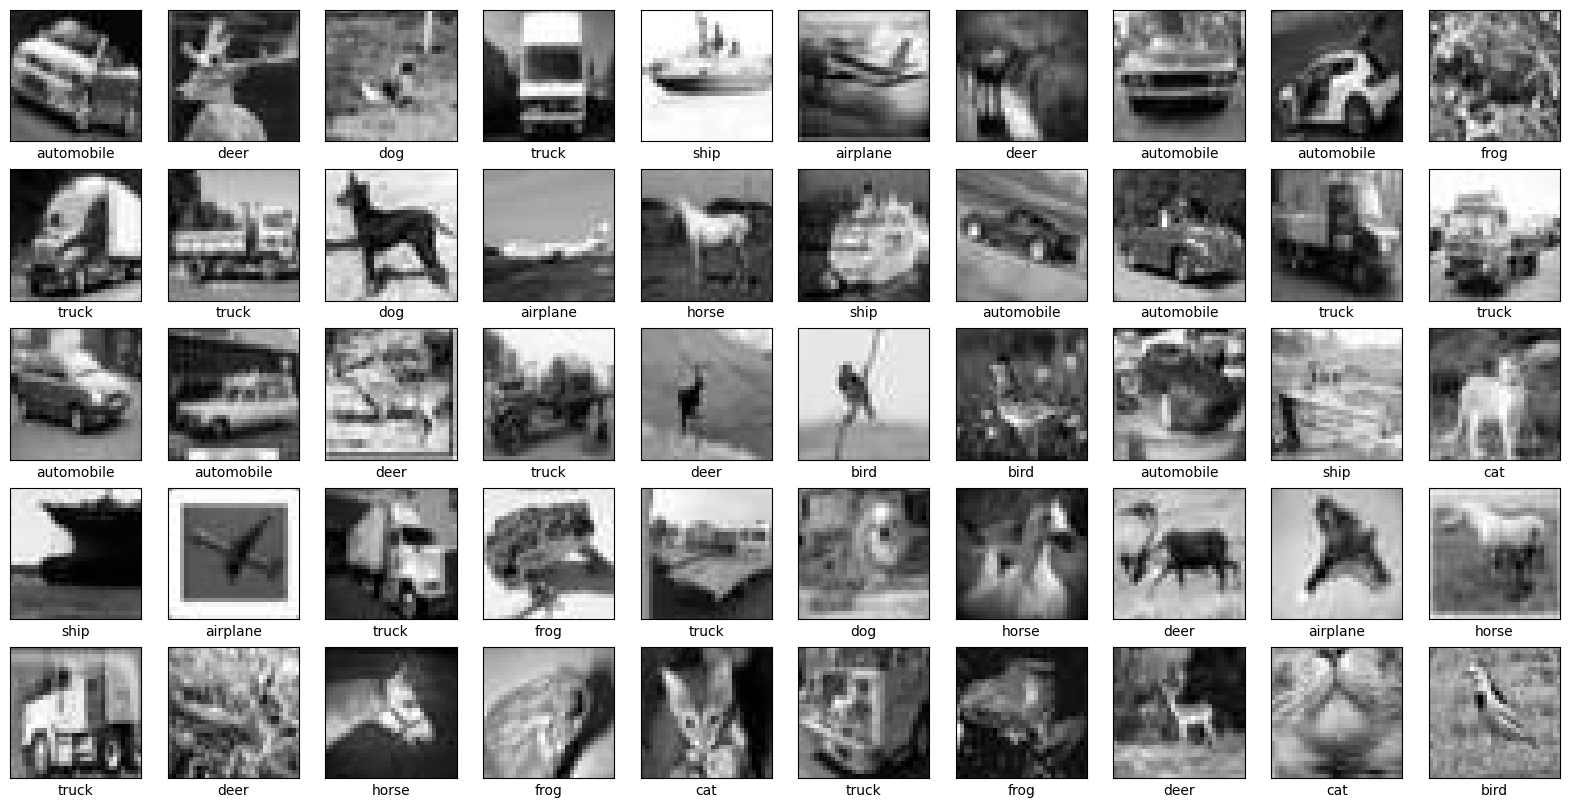

In [8]:
plt.figure(figsize=(20, 10))



for i in range(50):

    plt.subplot(5, 10, i + 1)

    plt.imshow(TRAIN_DATA[i][0], cmap='gray')

    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])

    plt.xticks([])

    plt.yticks([])

    if i == 50:

        break

plt.show()

In [9]:
f0 = TRAIN_DATA[:1000]

f1 = TRAIN_DATA[1000:2000]

f2 = TRAIN_DATA[2000:3000]

f3 = TRAIN_DATA[3000:4000]

f4 = TRAIN_DATA[4000:5000]

In [10]:
def plot_accuracies(fold, k_values, accuracies):

    best = [0, 0]

    for k in k_values:

        accuracy_values = accuracies[k]

        if best[1] < max(accuracy_values):

            best[0] = k

            best[1] = max(accuracy_values)

        plt.scatter([k] * len(accuracy_values), accuracy_values)



    accuracies_mean = np.array([np.mean(values) for key, values in sorted(accuracies.items())])

    accuracies_std = np.array([np.std(values) for key, values in sorted(accuracies.items())])

    plt.errorbar(k_values, accuracies_mean, yerr=accuracies_std)

    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")

    plt.xlabel('k')

    plt.ylabel('Accuracy')

    plt.show()

In [11]:
k_values = [1, 3, 5, 7, 9]

k_values_error_l1 = {}

k_values_error_l2 = {}

for k in k_values:

    k_values_error_l1[k] = []

    k_values_error_l2[k] = []

In [12]:
midpoint_l1_accuracies = []

midpoint_l2_accuracies = []



for i in range(5):

    if i == 0:

        train_set = f1 + f2 + f3 + f4

        validation_set = f0

    elif i == 1:

        train_set = f0 + f2 + f3 + f4

        validation_set = f1

    elif i == 2:

        train_set = f0 + f1 + f3 + f4

        validation_set = f2

    elif i == 3:

        train_set = f0 + f1 + f2 + f4

        validation_set = f3

    elif i == 4:

        train_set = f0 + f1 + f2 + f3

        validation_set = f4



    l1_accuracies = []

    l2_accuracies = []

    for k in k_values:

        l1_correct = 0

        l2_correct = 0

        total = 0

        for validation_data in tqdm(validation_set):

            v_img = validation_data[0]

            v_label = validation_data[1]

            l1_scores = []

            l2_scores = []

            for train_data in train_set:

                t_img = train_data[0]

                t_label = train_data[1]



                l1_dist = np.sum(np.abs(t_img - v_img))

                l1_scores.append((l1_dist, t_label))



                l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))

                l2_scores.append((l2_dist, t_label))

            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]

            l1_neighbors = [s[1] for s in sorted_l1_scores]

            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)



            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]

            l2_neighbors = [s[1] for s in sorted_l2_scores]

            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)

            if l1_prediction == v_label:

                l1_correct += 1

            if l2_prediction == v_label:

                l2_correct += 1



            total += 1



        l1_accuracy = l1_correct / total

        l1_accuracies.append(l1_accuracy)

        k_values_error_l1[k].append(l1_accuracy)



        l2_accuracy = l2_correct / total

        l2_accuracies.append(l2_accuracy)

        k_values_error_l2[k].append(l2_accuracy)



        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))



    min_l1_accuracy = min(l1_accuracies)

    max_l1_accuracy = max(l1_accuracies)

    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2

    midpoint_l1_accuracies.append(midpoint_l1_accuracy)



    min_l2_accuracy = min(l2_accuracies)

    max_l2_accuracy = max(l2_accuracies)

    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2

    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

100%|██████████| 1000/1000 [01:32<00:00, 10.81it/s]


Fold 0, k = 1, L1 accuracy = 16.90%, L2 accuracy = 14.80%


100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Fold 0, k = 3, L1 accuracy = 16.80%, L2 accuracy = 14.70%


100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Fold 0, k = 5, L1 accuracy = 16.10%, L2 accuracy = 14.40%


100%|██████████| 1000/1000 [01:28<00:00, 11.28it/s]


Fold 0, k = 7, L1 accuracy = 15.90%, L2 accuracy = 13.70%


100%|██████████| 1000/1000 [01:29<00:00, 11.17it/s]


Fold 0, k = 9, L1 accuracy = 16.20%, L2 accuracy = 14.30%


100%|██████████| 1000/1000 [01:29<00:00, 11.16it/s]


Fold 1, k = 1, L1 accuracy = 16.50%, L2 accuracy = 16.30%


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Fold 1, k = 3, L1 accuracy = 16.30%, L2 accuracy = 16.30%


100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


Fold 1, k = 5, L1 accuracy = 16.30%, L2 accuracy = 15.90%


100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


Fold 1, k = 7, L1 accuracy = 16.90%, L2 accuracy = 16.00%


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Fold 1, k = 9, L1 accuracy = 16.40%, L2 accuracy = 15.90%


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Fold 2, k = 1, L1 accuracy = 18.10%, L2 accuracy = 14.70%


100%|██████████| 1000/1000 [01:30<00:00, 11.11it/s]


Fold 2, k = 3, L1 accuracy = 16.70%, L2 accuracy = 14.60%


100%|██████████| 1000/1000 [01:29<00:00, 11.22it/s]


Fold 2, k = 5, L1 accuracy = 16.60%, L2 accuracy = 14.70%


100%|██████████| 1000/1000 [01:28<00:00, 11.24it/s]


Fold 2, k = 7, L1 accuracy = 17.60%, L2 accuracy = 16.40%


100%|██████████| 1000/1000 [01:30<00:00, 11.11it/s]


Fold 2, k = 9, L1 accuracy = 18.10%, L2 accuracy = 15.20%


100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Fold 3, k = 1, L1 accuracy = 17.10%, L2 accuracy = 15.50%


100%|██████████| 1000/1000 [01:29<00:00, 11.14it/s]


Fold 3, k = 3, L1 accuracy = 17.00%, L2 accuracy = 15.50%


100%|██████████| 1000/1000 [01:30<00:00, 11.08it/s]


Fold 3, k = 5, L1 accuracy = 18.20%, L2 accuracy = 15.00%


100%|██████████| 1000/1000 [01:29<00:00, 11.13it/s]


Fold 3, k = 7, L1 accuracy = 17.70%, L2 accuracy = 15.00%


100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Fold 3, k = 9, L1 accuracy = 16.90%, L2 accuracy = 16.00%


100%|██████████| 1000/1000 [01:29<00:00, 11.18it/s]


Fold 4, k = 1, L1 accuracy = 17.30%, L2 accuracy = 16.50%


100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


Fold 4, k = 3, L1 accuracy = 16.80%, L2 accuracy = 17.40%


100%|██████████| 1000/1000 [01:29<00:00, 11.16it/s]


Fold 4, k = 5, L1 accuracy = 17.60%, L2 accuracy = 17.20%


100%|██████████| 1000/1000 [01:28<00:00, 11.29it/s]


Fold 4, k = 7, L1 accuracy = 17.20%, L2 accuracy = 16.70%


100%|██████████| 1000/1000 [01:29<00:00, 11.19it/s]

Fold 4, k = 9, L1 accuracy = 17.00%, L2 accuracy = 17.60%


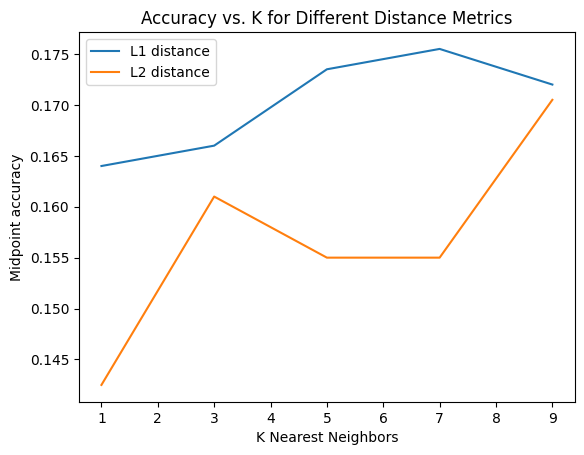

In [13]:
plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')

plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')

plt.xlabel('K Nearest Neighbors')

plt.ylabel('Midpoint accuracy')

plt.title('Accuracy vs. K for Different Distance Metrics')

plt.legend()

plt.show()